<h1><p style="text-align:center">***THE SPARKS FOUNDATION***</p></h1>

<h2><p style="text-align:center">Data Science & Business Analytics Internship (#GRIPMARCH21)</p></h2>

### Created By : SHASHANK M. PARALKAR

## TASK 2 - Prediction using Unsupervised ML

<h1><p style="text-align:center">Problem Statement:</p></h1>

### QUESTION:  From the given ‘Iris’ dataset, Predict the Optimum Number Of Clusters And Represent it Visually.

- Let’s implement k-means clustering using a famous dataset: the Iris dataset. 
- This dataset contains 3 classes of 50 instances each and each class refers to a type of iris plant.
- The dataset has four features: sepal length, sepal width, petal length, and petal width.
- The fifth column is for species, which holds the value for these types of plants.
- For example, one of the types is a setosa, as shown in the image below.






- To start Python coding for k-means clustering, let’s start by importing the required libraries. 
- Apart from NumPy, Pandas, and Matplotlib, we’re also importing KMeans from sklearn.cluster, as shown below.

## <h1><p style="text-align:center"> Step 1:  Importing Required Libraries -</p></h1>


In [42]:
# Python Libraries:
import pandas as pd
import numpy as np


# Libraries for Visualization:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Libraries for Dataset:
from sklearn import datasets


# Libraries for Kmeans:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

##  <h1><p style="text-align:center">Step 2 : Reading the Data into Pandas Dataframe- </p></h1>

- We’re reading the Iris dataset using the datasets.load_iris() method and storing the data in a data frame df.
- After populating the data frame df, we use the head() method on the dataset to see its first 5 records.

In [34]:
# Load the datase

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [35]:
# Checking first 5 rows:

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# Five Number Summary:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


##  <h1><p style="text-align:center"> Step 3: Understanding the Data - </p></h1>



- ### **Datatype Of Columns**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


- We can conclude that the datatypes are correctly used as per the requirement of the data.

- ### **Shape Of Data**

In [11]:
print('Number of Rows :',df.shape[0])
print('Number of Columns :',df.shape[1])

Number of Rows : 150
Number of Columns : 4


- The Iris dataset has 150 rows and 4 columns.

* ### **Null Values**

In [10]:
(df.isnull().sum()/len(df))*100

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

- There are no null values in the Iris dataset.

##  <h1><p style="text-align:center"> Step 4: Visualizations -</p></h1>

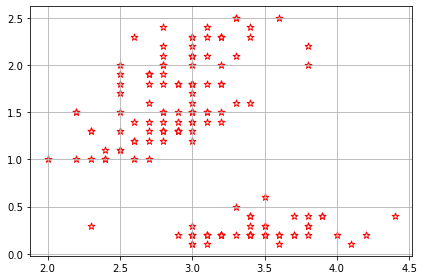

In [38]:
# Do the scatter plot and see that clusters are evident

x = iris.data
y = iris.target

plt.scatter(x[:,1], x[:,3],color='white', marker='*', edgecolor='red', s=50)
plt.grid()
plt.tight_layout()
plt.show()

- Now we select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable called x so that we can train our model with these features. For this, we use the iloc function on **df**, and the column index (0,1,2,3) for the above four columns are used, as shown below:

In [40]:
x = df.iloc[:, [0,1,2,3]].values

- There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of k. To implement the Elbow method, we need to create some Python code (shown below), and we’ll plot a graph between the number of clusters and the corresponding error value. This graph generally ends up shaped like an elbow, hence its name:

## <h1><p style="text-align:center">Step 5: Find the Optimum number of Clusters using Elbow method / Creating K-Means Classifier -</p></h1>


In [43]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

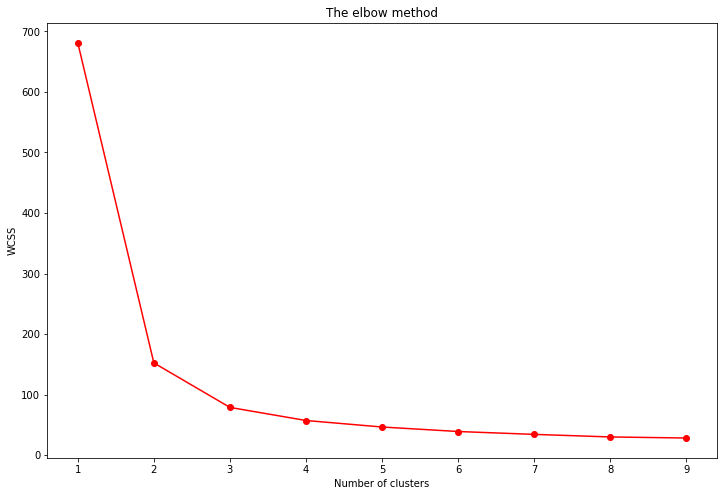

In [44]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'

plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), wcss, 'ro-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

- As we can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph. **Let’s implement k-means using k=3**


### <p style="text-align:center">Implement K-means Clustering with k=3</p>

In [45]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [46]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

- Finally, its time to visualize the three clusters that were formed with the optimal k value. We can clearly see three clusters in the image below, with each cluster represented by a different color

### <p style="text-align:center"> Visualizations Clustering -</p>

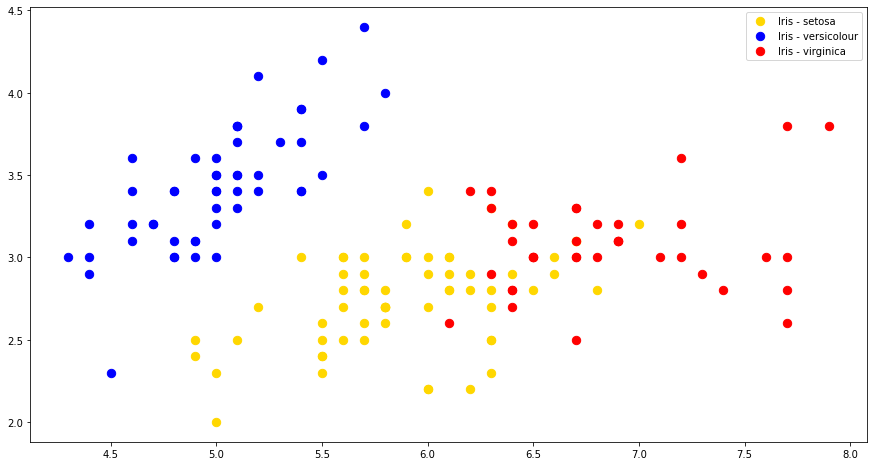

In [48]:
# Visualising the clusters 
# Preferably on the first two columns

plt.figure(figsize=(15,8))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 70, color = 'gold', label = 'Iris - setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 70, color = 'blue', label = 'Iris - versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 70, color = 'red', label = 'Iris - virginica')
plt.legend()
plt.show()

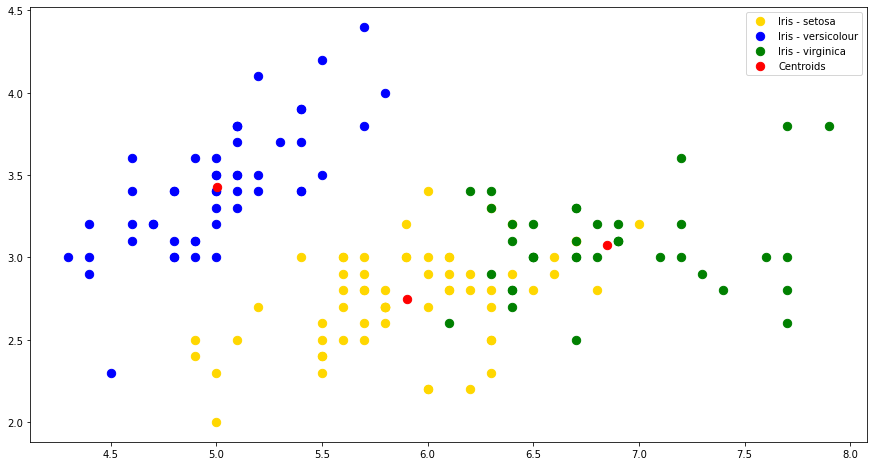

In [55]:
# Plotting centroids of the clusters

plt.figure(figsize=(15,8))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],s = 70, color = 'gold', label = 'Iris - setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],s = 70, color = 'blue', label = 'Iris - versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],s = 70, color = 'green', label = 'Iris - virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, color = 'red', label = 'Centroids')
plt.legend()
plt.show()

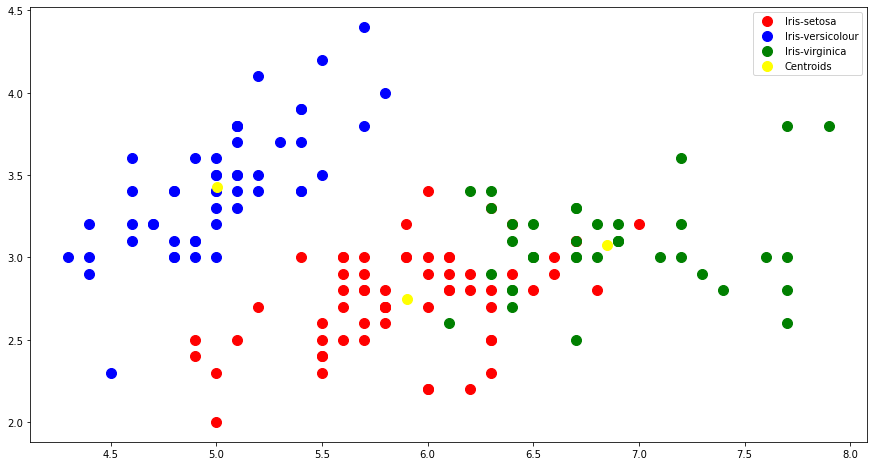

In [57]:
# Visualising the clusters 


plt.figure(figsize=(15,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')



# Plotting centroids of the clusters



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

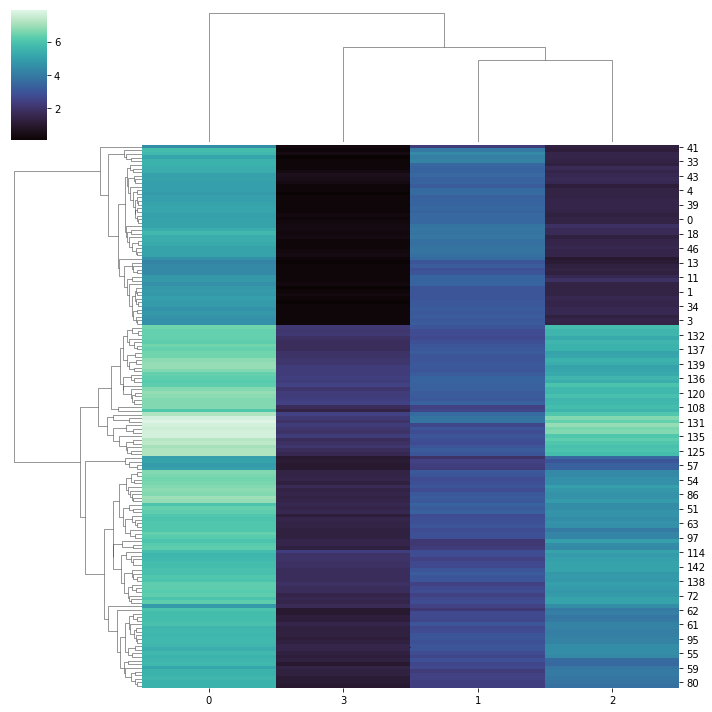

In [58]:
sns.clustermap(x,cmap='mako')
plt.show()

<h1><p style="text-align:center">Thank You!! </p></h1>